In [1]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import the libraries
import pandas as pd
import numpy as np

In [3]:
#read the dataset and check the first five rows
data = pd.read_csv('loan.csv')
data.head()


C:\Users\Sanket Bhave\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Check the shape of the dataframe
data.shape

(39717, 111)

In [5]:
#Check the datatypes of all the columns of the dataframe
data.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [6]:
#Check the number of null values in the columns
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#checking missing & Null Values

missing_val = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'missing_val': missing_val.round(2)})
missing_value_df.sort_values('missing_val', inplace=True)

In [8]:
#Missing Val Count
(missing_value_df['missing_val'] == 100.00).sum()

54

In [72]:
missing_val_columns = missing_value_df[(missing_value_df['missing_val'] == 100.00)].column_name.tolist()
missing_val_columns

['num_bc_sats',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'mort_acc',
 'num_bc_tl',
 'num_tl_op_past_12m',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'mo_sin_rcnt_tl',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'verification_status_joint',
 'mo_sin_old_il_acct',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'total_bc_limit',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_ut

In [10]:
# Dropped columns which are having missing Val
dropped_data1 = data.drop(missing_val_columns, axis=1)

In [11]:
dropped_data1 = dropped_data1.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d','mths_since_last_record', 'mths_since_last_delinq'], axis=1)

In [12]:
## Deleting column having all values as same. So not adding any importance in analysis

dropped_data1 = dropped_data1.drop(['delinq_amnt', 'acc_now_delinq', 'application_type', 'policy_code', 'pymnt_plan'], axis=1)

In [13]:
dropped_data1 = dropped_data1.drop(['initial_list_status', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med'], axis=1)

In [14]:
dropped_data1 = dropped_data1.drop(['emp_title'],axis=1)

In [15]:
#to check null values
dropped_data1.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

In [16]:
#checking the number of Rows & col
dropped_data1.shape

(39717, 40)

In [17]:
data = []
for row in dropped_data1.columns.tolist():
    data.append({'column': row, 'count': len(dropped_data1[row].unique())})

In [18]:
unique = pd.DataFrame(data).sort_values('count')
unique.head()

,column,count
3,term,2
13,loan_status,3
11,verification_status,3
39,pub_rec_bankruptcies,4
23,pub_rec,5


## Adding the columns

In [19]:
Col = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'emp_length_years', 'revol_util_percentage']

In [20]:
# null_columns_dropped_data[null_columns_dropped_data.isnull().sum(axis=1) >= 2]
dropped_data1['term_months'] = dropped_data1['term'].str.rstrip('months')
del dropped_data1['term']

In [21]:
dropped_data1['emp_length_years']=dropped_data1['emp_length'].str.rstrip('years')
dropped_data1['emp_length_years'].replace({'10+': '10'}, inplace=True)
dropped_data1['emp_length_years' == '<1'] ='0.5'
del dropped_data1['emp_length']

In [22]:
dropped_data1['int_rate_percentage'] = dropped_data1['int_rate'].str.rstrip('%')
del dropped_data1['int_rate']

In [23]:
dropped_data1['revol_util_percentage'] = dropped_data1['revol_util'].str.rstrip('%')
del dropped_data1['revol_util']

In [24]:
dropped_data1['issue_d_month'], dropped_data1['issue_d_year'] = dropped_data1['issue_d'].str.split('-').str

dropped_data1['last_credit_pull_d_month'],dropped_data1['last_credit_pull_d_year'] = dropped_data1['last_credit_pull_d'].str.split('-').str

dropped_data1['last_pymnt_d_month'], dropped_data1['last_pymnt_d_year'] = dropped_data1['last_pymnt_d'].str.split('-').str

dropped_data1['earliest_cr_line_month'], dropped_data1['earliest_cr_line_year'] = dropped_data1['earliest_cr_line'].str.split('-').str
   
dropped_data1['issue_d_year'] = '20' + dropped_data1['issue_d_year']
    

<ipython-input-24-90b92b8f7892>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  dropped_data1['issue_d_month'], dropped_data1['issue_d_year'] = dropped_data1['issue_d'].str.split('-').str
<ipython-input-24-90b92b8f7892>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  dropped_data1['last_credit_pull_d_month'],dropped_data1['last_credit_pull_d_year'] = dropped_data1['last_credit_pull_d'].str.split('-').str
<ipython-input-24-90b92b8f7892>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  dropped_data1['last_pymnt_d_month'], dropped_data1['last_pymnt_d_year'] = dropped_data1['last_pymnt_d'].str.split('-').str
<ipython-input-24-90b92b8f7892>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  dropped_data1['earliest_cr_line_month'], dropped_data1['earliest_cr_line_year'] = dropped_data1['earliest_cr_line'].str.split

In [25]:
#create Profit n loss 

dropped_data1['PL'] = (dropped_data1['total_pymnt']-dropped_data1['funded_amnt'])*100/dropped_data1['funded_amnt']

In [26]:
dropped_data1['loan_inc_ratio']=dropped_data1.funded_amnt*100/dropped_data1.annual_inc

In [27]:
col = ['total_acc', 'term_months', 'issue_d_year']

In [28]:
numeric_data = dropped_data1.select_dtypes(include = [np.number])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   installment              39717 non-null  float64
 4   annual_inc               39717 non-null  float64
 5   dti                      39717 non-null  float64
 6   delinq_2yrs              39717 non-null  int64  
 7   inq_last_6mths           39717 non-null  int64  
 8   open_acc                 39717 non-null  int64  
 9   pub_rec                  39717 non-null  int64  
 10  revol_bal                39717 non-null  int64  
 11  total_acc                39717 non-null  int64  
 12  out_prncp                39717 non-null  float64
 13  out_prncp_inv            39717 non-null  float64
 14  total_pymnt           

In [29]:
#Number of categorical & Numeric records
categorical_data = dropped_data1.select_dtypes(exclude = [np.number, np.object])
string_data = dropped_data1.select_dtypes(include = [np.object])
print('There are {0} numerical , {1} categorical and {2} string features in the training data'.format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))



There are 25 numerical , 0 categorical and 26 string features in the training data


<ipython-input-29-c6cf06d5de40>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_data = dropped_data1.select_dtypes(exclude = [np.number, np.object])
<ipython-input-29-c6cf06d5de40>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  string_data = dropped_data1.select_dtypes(include = [np.object])


In [30]:
dropped_data1=dropped_data1[dropped_data1.loan_status != 'Current']
dropped_data1=dropped_data1.loc[:,dropped_data1.nunique() !=1]

In [31]:
df=dropped_data1

In [32]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## Univariate Analysis

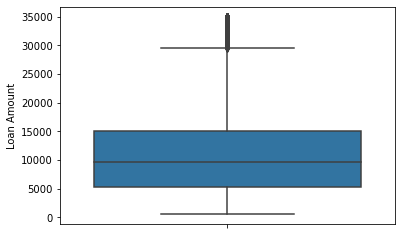

In [33]:
#Craete boxplot for loan amount column

sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

Boxplot shows : Median Val = 10000
                Range 0-35,000

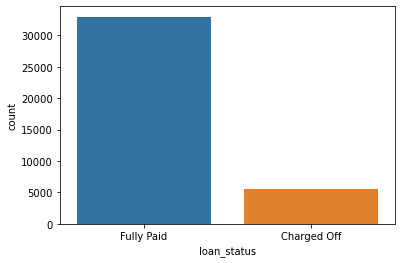

In [34]:

sns.countplot(x= dropped_data1["loan_status"])
plt.show()

In [35]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

defaulters are : 5627


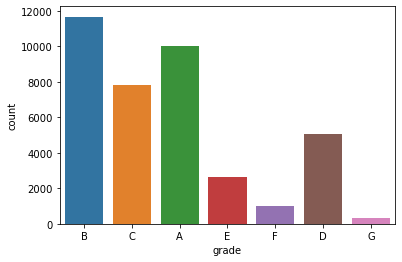

In [36]:
sns.countplot(x='grade', data=df)
plt.show()

It shows high graded loans

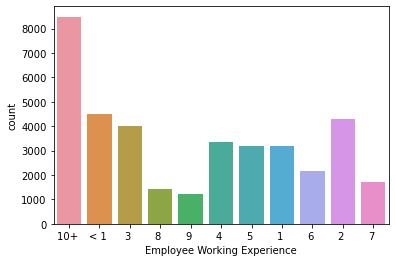

In [37]:
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

Employee work experience having 10+ years are most likely to apply for the loan

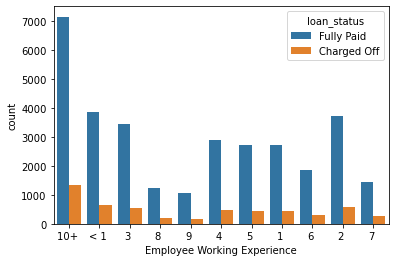

In [38]:
#Count plot Loan Status VS Emp Working experince
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

C:\Users\Sanket Bhave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


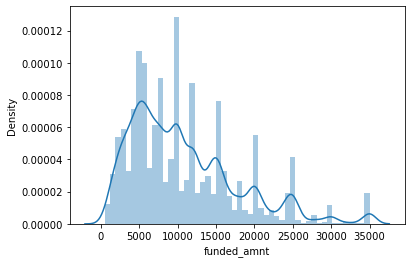

In [39]:
sns.distplot(df['funded_amnt'])
plt.show()

In [40]:
dropped_data1['annual_inc_lakhs'] = dropped_data1['annual_inc'] / 1000
dropped_data1['annual_inc_lakhs'].describe()

count    38577.000000
mean        68.777974
std         64.218682
min          4.000000
25%         40.000000
50%         58.868000
75%         82.000000
max       6000.000000
Name: annual_inc_lakhs, dtype: float64

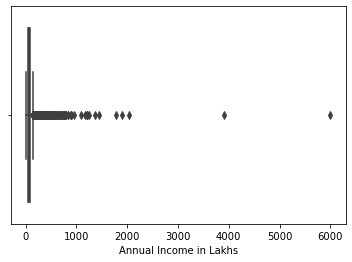

In [41]:

sns.boxplot(x=df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

Dataset has only 2 employee whos income is above 30 Lakh

# majority employee apply for the loan 

C:\Users\Sanket Bhave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


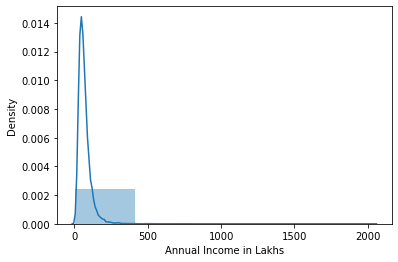

In [42]:
sns.distplot(df[df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

The majority of employees apply for the loan is income is below 5L

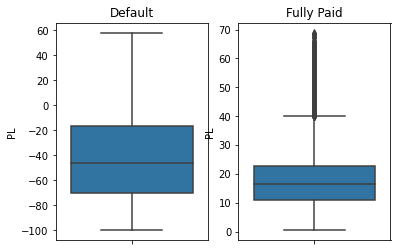

In [43]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PL)
plt.show()

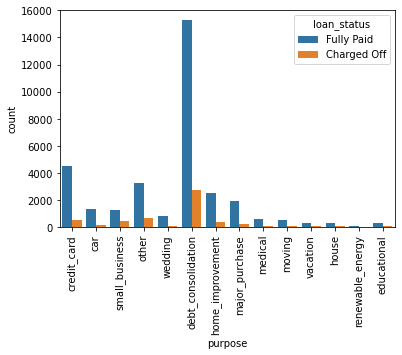

In [44]:
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

The debt consolidation loan are mostly fully paid

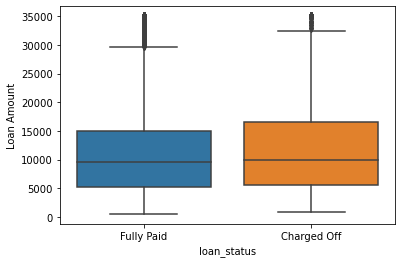

In [45]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Loan Amount')
plt.show()

Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

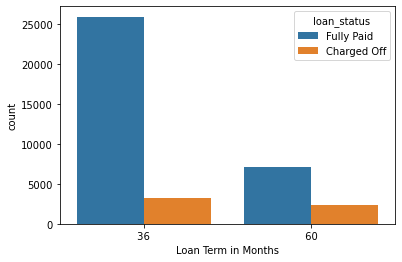

In [46]:
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

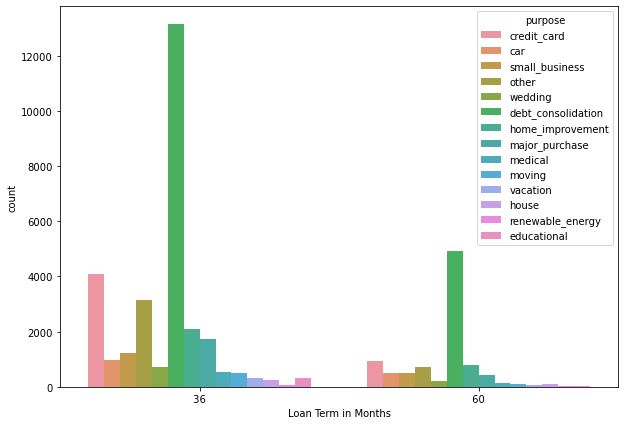

In [47]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

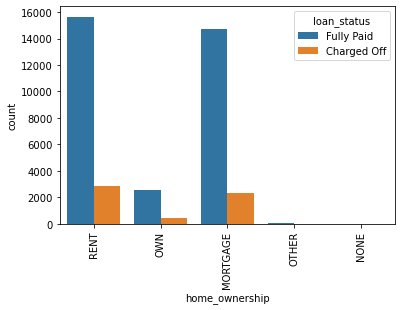

In [48]:

sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

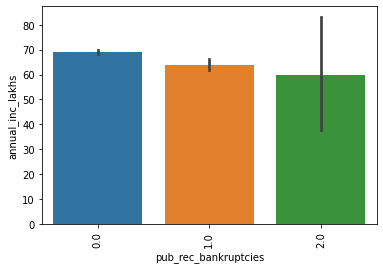

In [49]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.show()

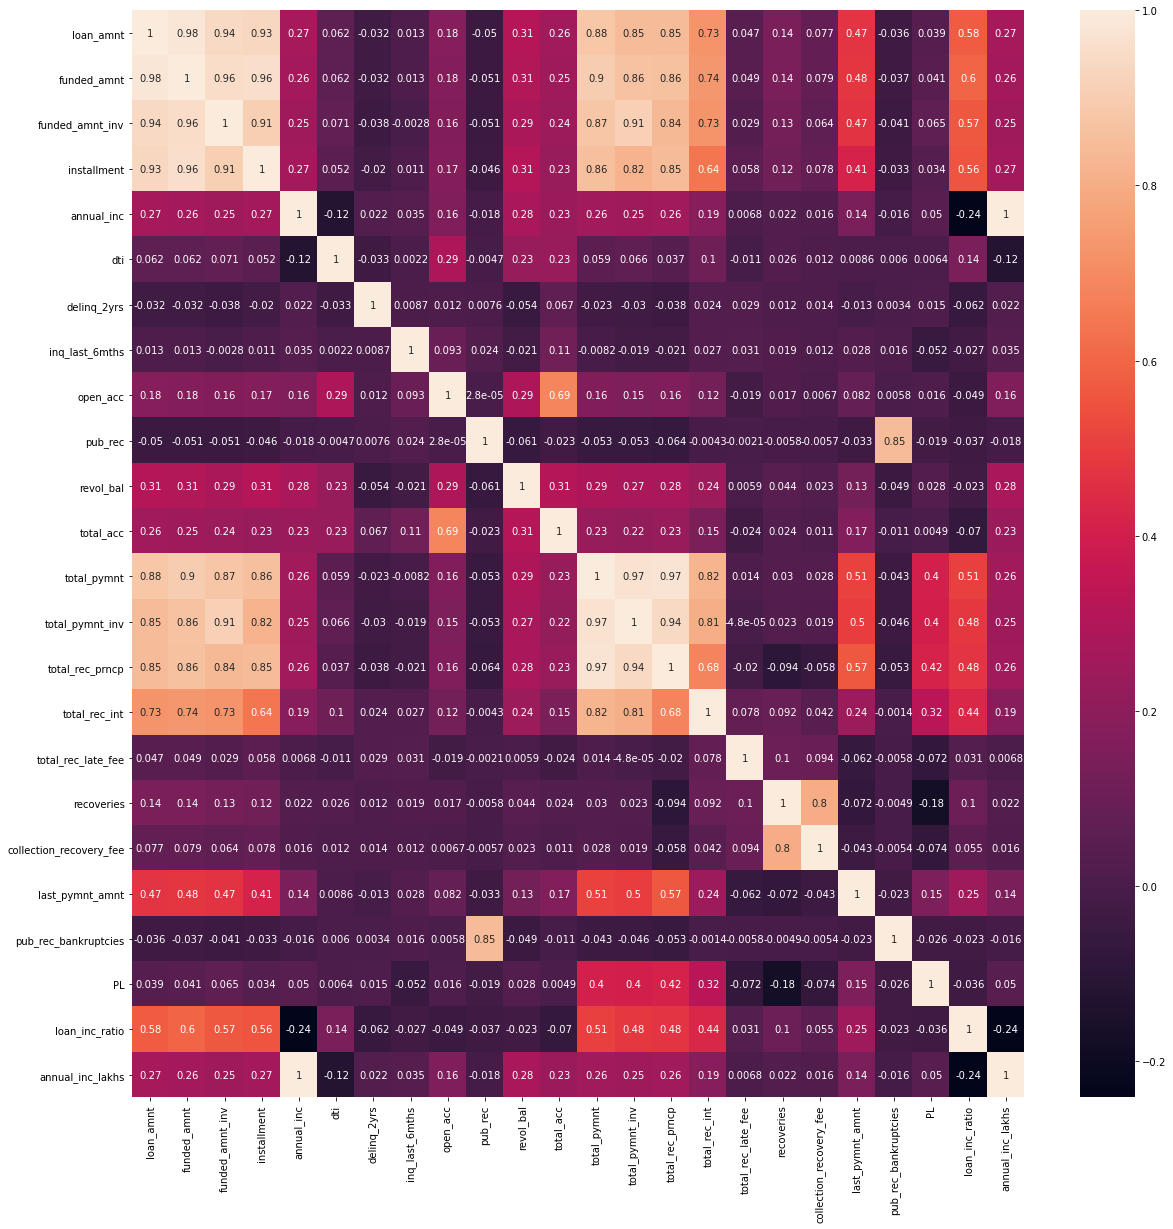

In [69]:

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [51]:
numeric_data.out_prncp_inv.value_counts()

0.00       38577
1972.60        2
827.13         2
1664.64        2
1212.39        1
           ...  
1169.55        1
2641.55        1
136.41         1
781.33         1
1920.96        1
Name: out_prncp_inv, Length: 1138, dtype: int64

In [52]:
numeric_data_t = numeric_data.drop(columns=["out_prncp","out_prncp_inv"])

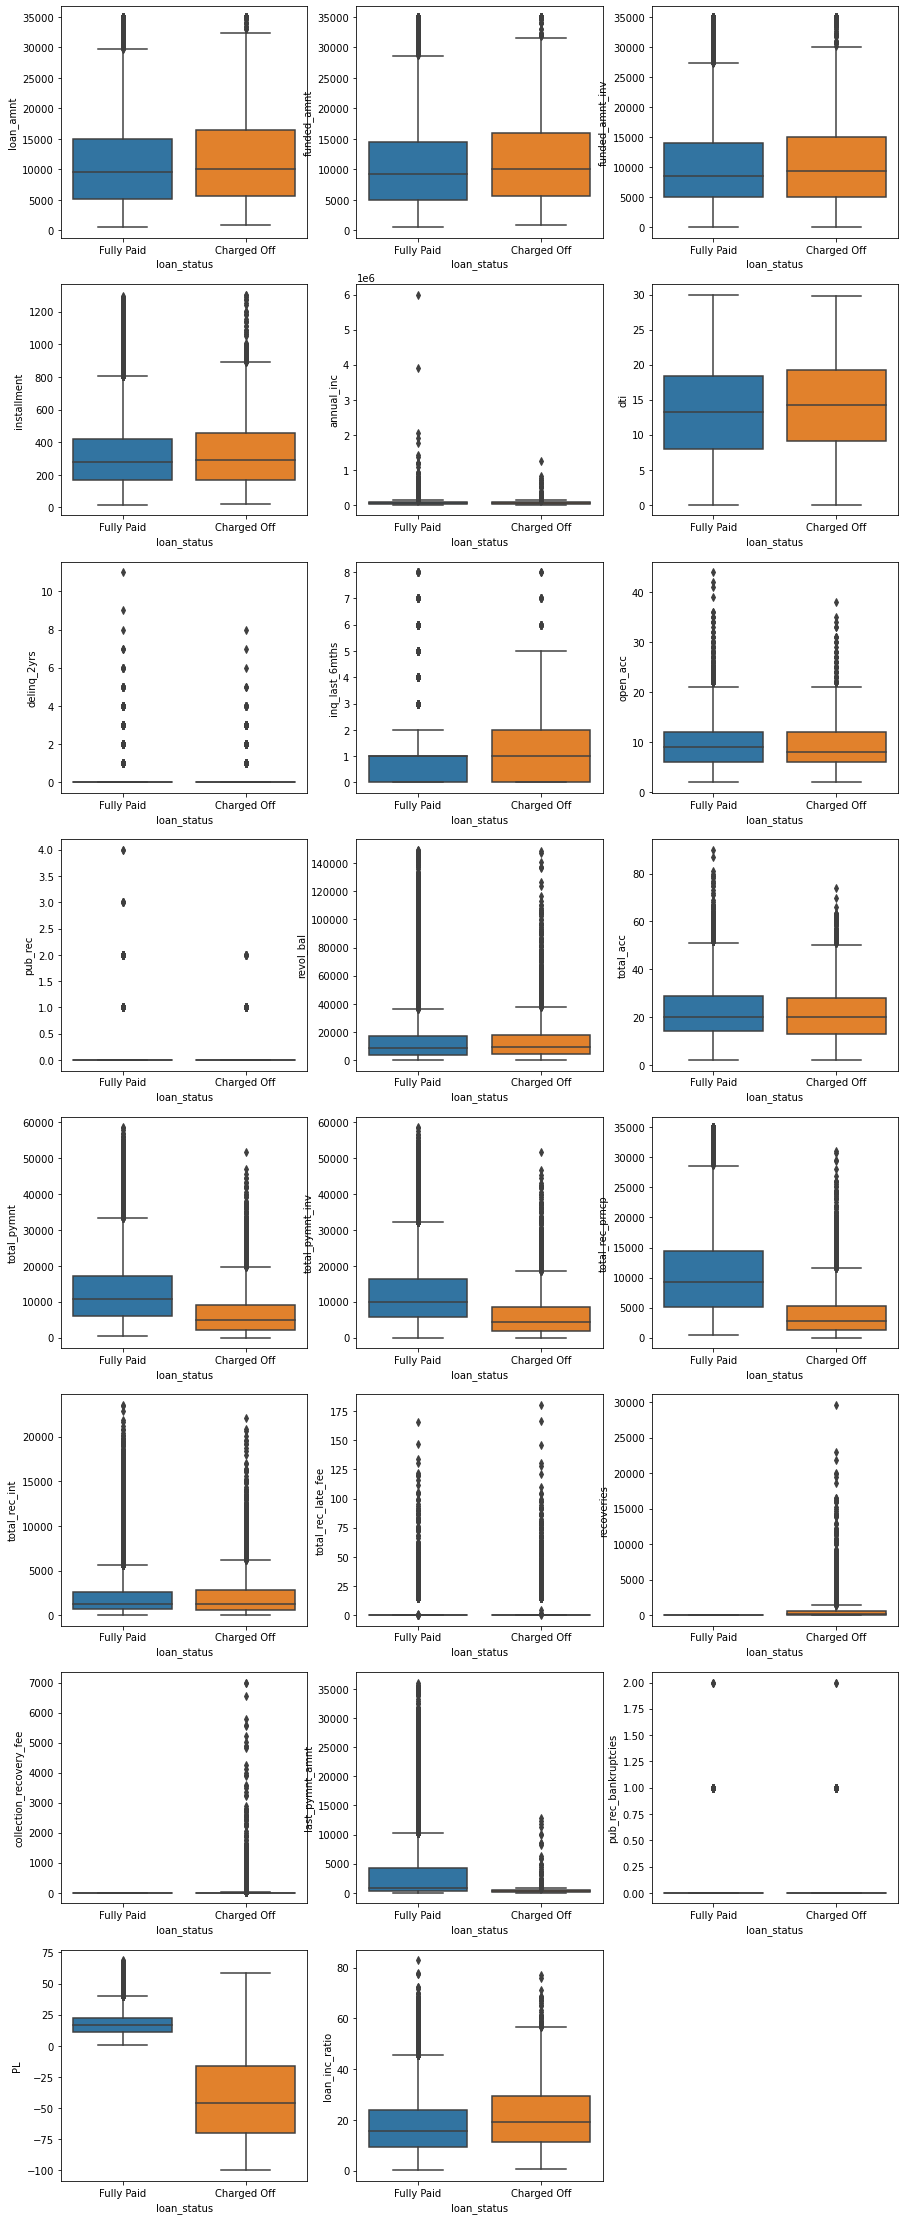

In [53]:
plt.figure(figsize=(15,40))


for i in range(len(numeric_data_t.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data_t.columns[i], x='loan_status', data=df)

plt.show()

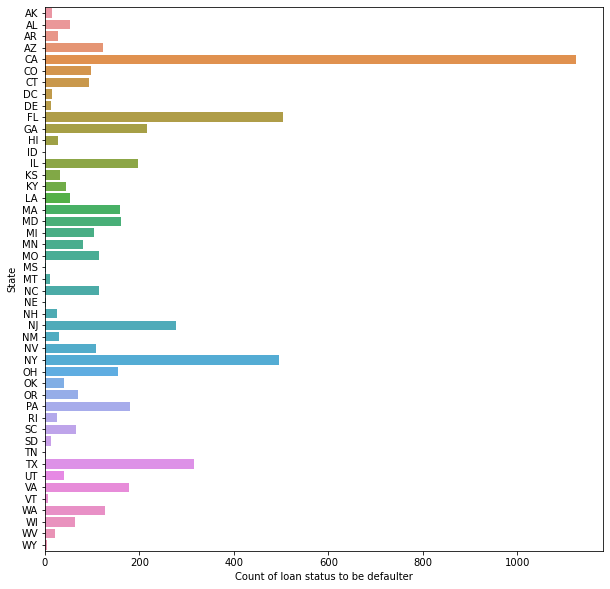

In [54]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

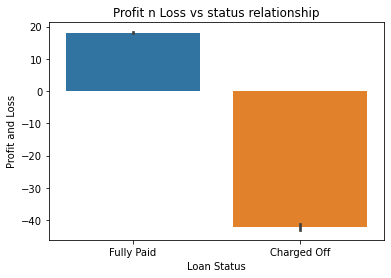

In [55]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='PL',data=df)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

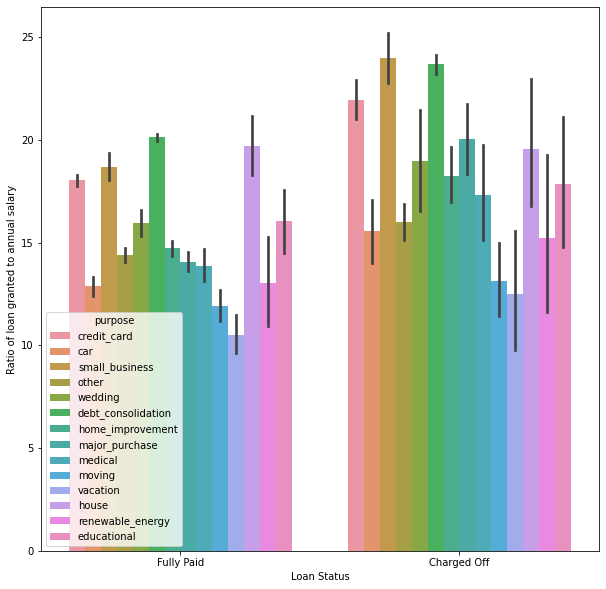

In [73]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted to annual salary')
plt.show()


In [57]:

df_agg = df[df['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

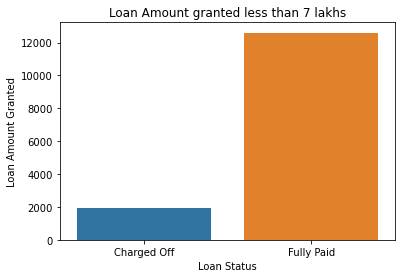

In [58]:

sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [59]:
df_agg = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

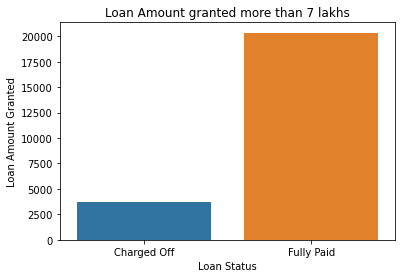

In [60]:

sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [61]:
dropped_data1.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [62]:
purposes = dropped_data1.purpose.value_counts()
purposes

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

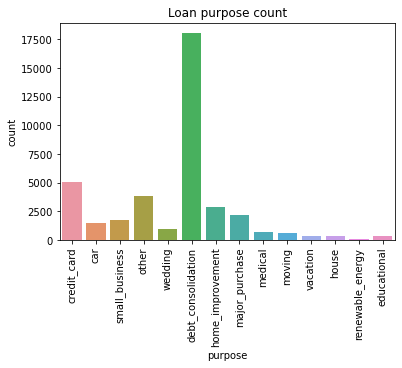

In [63]:
#visualise the information using Bar chart Purpose Vs Count
sns.countplot(x='purpose', data=dropped_data1)
plt.title("Loan purpose count")
plt.xticks(rotation=90)

 Debt_consolidation is main category which has maximum number of loans

C:\Users\Sanket Bhave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


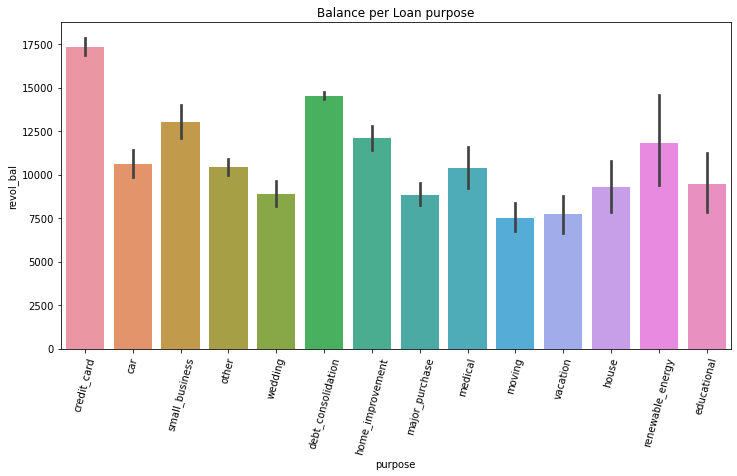

In [64]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Balance per Loan purpose")
sns.barplot('purpose', y='revol_bal', data=dropped_data1);

Highest category for loan purposes are house & Small business, however debt_consolidation is at 3rd

In [65]:
data1 = dropped_data1

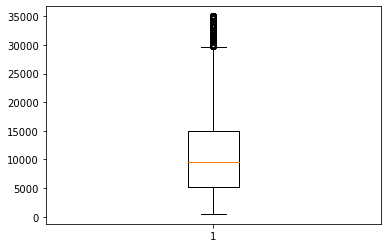

In [66]:
#Create a box plot for the price column
plt.boxplot(dropped_data1.funded_amnt)
plt.show()